In [1]:
from astropy.io import fits
import os
from spotfinder import spotfinder
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import math
from sbigCam import *
import time
import pandas as pd
from scipy.stats import norm
import matplotlib.colors as mcolors
import circle_fit as cf

In [3]:
folder = time.strftime("%d%b%Y%H:%M:%S") #name the folder that will contain your photos

#change this next line to any place you want the folder to go
save_path = '/home/msdos/um_scripts/sbigpics/'
newpath = os.path.join(save_path, folder)
if not os.path.exists(newpath):
        os.makedirs(newpath)
newpath
os.chdir(newpath)
print(newpath) #show photo save location in full

/home/msdos/um_scripts/sbigpics/29Nov202210:38:06


In [4]:
xdata=[]
ydata=[]
peaksdata=[]
fwhmdata=[]
energy=[]

In [5]:
#if you suddenly have to stop the next line during photo taking, the camera will not close 
#you can run this to close it  
cam = SBIGCam()
cam.close_camera()

Code 20: device already closed.
Code 20: driver already closed.


True

In [98]:
cam = SBIGCam() #select camera and adjust settings 
cam.open_camera()
cam.select_camera('ST8300')
cam.set_exposure_time(10000)
cam.set_dark(False)
i = 1
while i <= 1: #number of times to run loop, aka number of photos
    image=cam.start_exposure()
    cam.write_fits(image,name = time.strftime("%Y-%m-%d-%H%M%S") + '.fits')
    print(f'Photo #{i} taken successfully.')
    i += 1
else: 
    cam.close_camera() #close camera after loop ends
    print('Done.')

{'camerasFound': 1,
 'updated': True,
 'usbInfo': [{'cameraFound': True,
              'cameraType': 'STF',
              'deviceType': 'USB1',
              'name': 'SBIG STF-8300 CCD Camera',
              'serialNumber': '83F011779'}]}
Photo #1 taken successfully.
Done.


In [99]:
files=glob(f'{newpath}/*.fits') #grab the files from the new directory
files.sort() #make sure files are in the order they were created
print(files)
files = files[:]

['/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-103820.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-104050.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-105151.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-105212.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-105228.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-105800.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-110102.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-110246.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-110508.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-110534.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-110622.fits', '/home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-110701.fits']


In [100]:
#line for importing photos already taken
#files = glob('/data/common/20221121/15degArcSeq2/*.fits')
#files.sort()

In [101]:
expected_spot_count = 1

In [108]:
centroids

{'peaks': [86477.0763247582],
 'x': [2053.689667790239],
 'y': [912.2657545827531],
 'fwhm': [3.523448355777125],
 'energy': [4.649386013410884]}

In [111]:
#spotfinder
xx, yy, peaks, fwhm, energy = [],[],[],[],[]
for file_name in files:
    try: #try to detect the spot
        sf=spotfinder.SpotFinder(file_name, expected_spot_count)
        centroids = sf.get_centroids(print_summary = True, region_file='regions.reg')
        
        print(centroids)
        #separate dictionaries for plotting purposes
        res = dict((k, centroids[k]) for k in ['x']
                                        if k in centroids)
        res2 = dict((k, centroids[k]) for k in ['y']
                                        if k in centroids)
        
        
        x =[value[i] for value in res.values()
             for i in range(expected_spot_count)]
        xx.append(x)
    
        y =[value[i] for value in res2.values()
             for i in range(expected_spot_count)]
        yy.append(y)
        peaks.append(centroids['peaks'][0] )
    except: #ignore photo if an error is raised
        pass

Edge hot spot


/data/common/software/products/python-3.6.15.Linux64/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1391: RuntimeWarning: invalid value encountered in true_divide
  for dir in range(input.ndim)]


Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot


/data/common/software/products/python-3.6.15.Linux64/lib/python3.6/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


 fit failed - trying again with smaller fitbox
peak = 71238.35071288353 brightness appears out of expected range
fwhm = 0.4120965804095754 appears invalid, check if fitbox size (7) is appropriate and dots are sufficiently illuminated
 File: /home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-104050.fits
 Number of centroids requested: 1
 Fitboxsize: 7
 Centroid list:
 Spot  x          y         FWHM    Peak     LD  
    0  1729.998  2255.337   0.41    71238    0.45 
 Min peak   : 71238.35 
 Max peak   : 71238.35 
 Mean peak  : 71238.35 
 Sigma peak :     0.00 
here
{'peaks': [71238.35071288353], 'x': [1729.9983038735627], 'y': [2255.3371596698707], 'fwhm': [0.4120965804095754], 'energy': [0.44796033757224907]}
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
 File: /home/msdos/um_scripts/sbigpics/29Nov202210:38:06/2022-11-29-105212.

In [112]:
peaks

[71238.35071288353,
 3470.143429988801,
 23990.98037077966,
 19578.77580726468,
 19484.136115952482,
 38952.79057895117,
 86262.1617487722,
 86477.0763247582]

In [105]:
# print(xx,yy)
coords=tuple(zip(xx,yy))
print(coords)
print(len(coords)) #tells you how many photos had detectable spots

(([1729.9983038735627], [2255.3371596698707]), ([2160.0084995078832], [2300.541738319163]), ([1730.0001366849108], [2255.3496426439538]), ([2053.7618654846005], [912.1687509776108]), ([2053.74446905907], [912.1626035354303]), ([2053.7364871604677], [912.185863131709]), ([2053.76972978881], [912.1373856200544]), ([2053.689667790239], [912.2657545827531]))
8


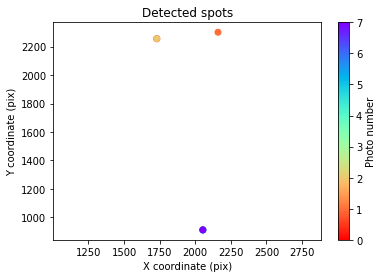

In [106]:
#plot the detected spots, color order indicates order of photos
clist=np.arange(start=0,stop=len(xx))
plt.scatter(xx,yy,c=clist,cmap='rainbow_r')
plt.colorbar(label ='Photo number')
plt.title('Detected spots')
plt.xlabel('X coordinate (pix)')
plt.ylabel('Y coordinate (pix)')
plt.axis('equal')
plt.show()

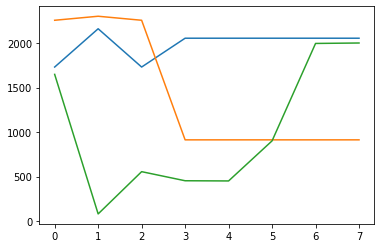

In [124]:
plt.plot(xx)
plt.plot(yy)
plt.plot(peaks/np.max(peaks)*2000)

In [12]:
distance = np.sqrt((xx-np.mean(xx))**2+(yy-np.mean(yy))**2)

/data/common/software/products/python-3.6.15.Linux64/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


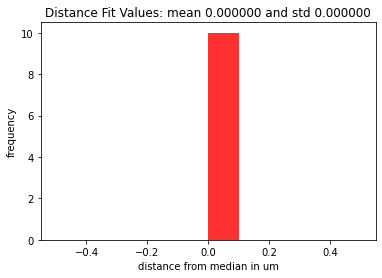

<Figure size 432x288 with 0 Axes>

In [13]:
mu, std = norm.fit(distance*41.6)

plt.hist(distance*41.6, density=1, color='#FF3131')
#plt.hist(scale, bins=5, density=True, alpha=0.6, color='b')

#plt.title("X coordinate distance from X median")
# adding labels
plt.xlabel('distance from median in um')
plt.ylabel('frequency')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Distance Fit Values: mean {:.6f} and std {:.6f}".format(mu, std)
plt.title(title)
  
plt.show()
plt.savefig("distfrommediandist.jpg")


In [14]:
coords = [[xx[i],yy[i]] for i in range(len(files))]
xc,yc,rhf,s = cf.hyper_fit(coords)
hfradius = rhf * .0417

/data/common/software/products/python-3.6.15.Linux64/lib/python3.6/site-packages/circle_fit/circle_fit.py:90: RuntimeWarning: invalid value encountered in double_scalars
  xnew = x - y/Dy
/data/common/software/products/python-3.6.15.Linux64/lib/python3.6/site-packages/circle_fit/circle_fit.py:99: RuntimeWarning: invalid value encountered in double_scalars
  Xcenter = (Mxz*(Myy - x) - Myz*Mxy)/det/2.
/data/common/software/products/python-3.6.15.Linux64/lib/python3.6/site-packages/circle_fit/circle_fit.py:100: RuntimeWarning: invalid value encountered in double_scalars
  Ycenter = (Myz*(Mxx - x) - Mxz*Mxy)/det/2.


Hyper fit radius: nan mm


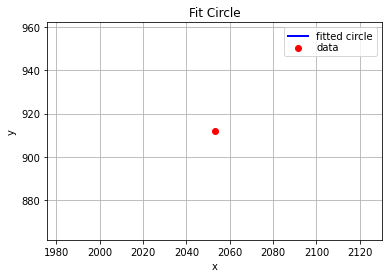

In [15]:
cf.plot_data_circle(xx,yy,xc,yc,rhf)
print('Hyper fit radius:',hfradius,'mm')
plt.show()

In [123]:
im = fits.getdata(files[-5])
np.unravel_index(im.argmax(), im.shape)

(912, 2054)